
# Social Network Analysis  A.A. 2020/21: 
<b><font size="4.8" color='red'>Data Understanding of "data_subreddit.csv "</font><br></b>
    
<font size="3"> Crossposting of subreddits in social network "Reddit"</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("scraping data/data/data_subreddit_cleaned.csv")

In [3]:
#Same functions
#The "delete_duplicate" function checks if there are duplicate rows in the dataframe and if so, deletes them.

def delete_duplicate(df):   
    tot_1=df.shape
    df=df.drop_duplicates()
    tot_f=df.shape
    dif=tot_1[0]-tot_f[0]
    if dif>0:
        print('The dataframe contains ', dif ,' duplicate rows')
        print('Duplicates have been eliminated')
    else:
        print("The dataframe Don't contains duplicate rows") 
        
    return df
  

 # the measures_df function gives us the number of columns and rows of the dataframe df. 
 # It also evaluates if there are null values 

def misures_df(df):       
    print('The "data_subreddit" dataframe has ',df.size, 'Elements.')
    print('Number of rows =',df.shape[0],', Number of columns =',df.shape[1])
    print('Does the matrix have null values? ', df.isnull().any().any())
 

### Analysis of the "data_subreddit" .


In [4]:
delete_duplicate(df)
misures_df(df)

The dataframe Don't contains duplicate rows
The "data_subreddit" dataframe has  1879569 Elements.
Number of rows = 208841 , Number of columns = 9
Does the matrix have null values?  False


In [5]:
df.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


### I create a new column called "new_date" in the dataframe df.
So what reddit is giving you is a UNIX TIMESTAMP which is basically the seconds since Jan 01 1970. (UTC) that needs to be converted into a human-readable date time setup.
I would suggest using the datatime module in python:
"new_date" contains the values ​​of the "date" column  transformed into date.

In [6]:
# first I create an empty list called "new_data", where later we will enter the date of the "date" column 
# converted into date format. I insert the converted date in the list (new_date") with a loop.

new_date=[]

for i in range(df.shape[0]):
    d=[]
    d=int(df["date"][i])
    new_date.append(datetime.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))


In [7]:
# Now we will use this list to assign values to the “new_date ” column that we will insert in the dataframe.
df["new_date"]=new_date

df.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent,new_date
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature,2021-04-24 03:26:46
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature,2021-04-24 08:24:43
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews,2021-04-23 22:56:03
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews,2021-04-24 05:39:33
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews,2021-04-24 05:30:03


From the date, that is from the "new_date" attribute,  we extrapolate the attributes :"days","time" ,"year", "month", "day","hour", and "day_week"

In [8]:
df['new_date'] = pd.to_datetime(df['new_date'], errors='coerce')
df['days'] = df['new_date'].dt.date
df['time'] = df['new_date'].dt.time
df['year'] = df['new_date'].dt.year
df['month'] = df['new_date'].dt.month
df['day'] = df['new_date'].dt.day
df['hour'] = df['new_date'].dt.hour
df['day_week']=df['new_date'].dt.weekday

In [9]:
df.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent,new_date,days,time,year,month,day,hour,day_week
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature,2021-04-24 03:26:46,2021-04-24,03:26:46,2021,4,24,3,5
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature,2021-04-24 08:24:43,2021-04-24,08:24:43,2021,4,24,8,5
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews,2021-04-23 22:56:03,2021-04-23,22:56:03,2021,4,23,22,4
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews,2021-04-24 05:39:33,2021-04-24,05:39:33,2021,4,24,5,5
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews,2021-04-24 05:30:03,2021-04-24,05:30:03,2021,4,24,5,5


In [10]:
misures_df(df)

The "data_subreddit" dataframe has  3550297 Elements.
Number of rows = 208841 , Number of columns = 17
Does the matrix have null values?  False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208841 entries, 0 to 208840
Data columns (total 17 columns):
Unnamed: 0    208841 non-null int64
from          208841 non-null object
to            208841 non-null object
id            208841 non-null object
title         208841 non-null object
score         208841 non-null float64
date          208841 non-null float64
comments      208841 non-null float64
parent        208841 non-null object
new_date      208841 non-null datetime64[ns]
days          208841 non-null object
time          208841 non-null object
year          208841 non-null int64
month         208841 non-null int64
day           208841 non-null int64
hour          208841 non-null int64
day_week      208841 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6), object(7)
memory usage: 27.1+ MB


### With the descibe function we go to display the maximum, minimum values  etc ..contained in each attribute (column) of our dataframe

In [12]:
df.describe()

,Unnamed: 0,score,date,comments,year,month,day,hour,day_week
count,208841.000000,208841.000000,2.088410e+05,208841.000000,208841.000000,208841.000000,208841.000000,208841.000000,208841.000000
mean,104420.000000,364.854717,1.609085e+09,12.936014,2020.635699,4.750897,16.144962,10.247763,3.021514
std,60287.348121,2436.167114,1.350793e+07,134.473445,0.570195,3.097461,8.326465,7.038476,1.924758
min,0.000000,0.000000,1.395687e+09,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000
25%,52210.000000,3.000000,1.605499e+09,0.000000,2020.000000,3.000000,9.000000,4.000000,1.000000
50%,104420.000000,18.000000,1.614598e+09,1.000000,2021.000000,4.000000,17.000000,9.000000,3.000000
75%,156630.000000,90.000000,1.617957e+09,6.000000,2021.000000,6.000000,23.000000,16.000000,5.000000
max,208840.000000,147549.000000,1.619313e+09,35614.000000,2021.000000,12.000000,31.000000,23.000000,6.000000


### Let's analyze the crosspost date, so we analyze the most important new attributes created by the "date" attribute:
<font size="3">A Bar Chart  give each attribute that gives us an immediate view of their content.


In [13]:
color1=[plt.cm.Blues(150),plt.cm.Set1(7),plt.cm.Accent(0),'red',plt.cm.Set3(9),plt.cm.Set1(8),'yellow','darkorange']
color2=[plt.cm.tab10(0),plt.cm.tab10(6),plt.cm.Accent(0),plt.cm.tab10(2),plt.cm.tab10(3),plt.cm.tab10(0),plt.cm.tab10(4)]
color3=['darkorange','yellow',plt.cm.Set1(8),plt.cm.Set3(9),'red',plt.cm.Accent(0),plt.cm.Set1(7),plt.cm.Blues(150)]


C:\Users\cinzia\anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


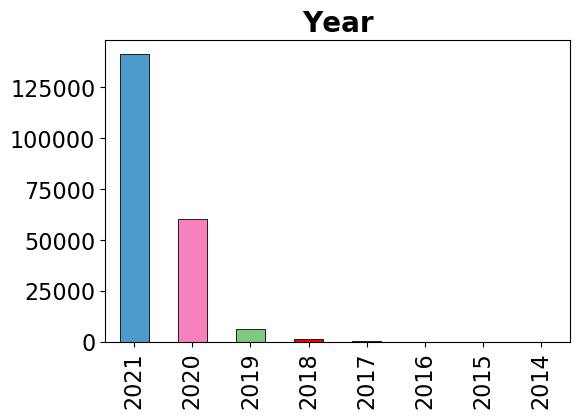

In [14]:
plt.figure(dpi=100)
df['year'].value_counts().plot.bar(colors=color1,edgecolor='black', linewidth=0.6),
plt.title('Year', fontsize=20,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [15]:
    val=df['year'].value_counts()
    print('Values or names contained in the attribute "year" and associated quantities\n')
    val

Values or names contained in the attribute "year" and associated quantities



2021    141247
2020     60301
2019      6163
2018      1082
2017        37
2016         7
2015         3
2014         1
Name: year, dtype: int64

<font size="3">The pie chart show us a best gives us a better view of the distribution of crossposts over the years

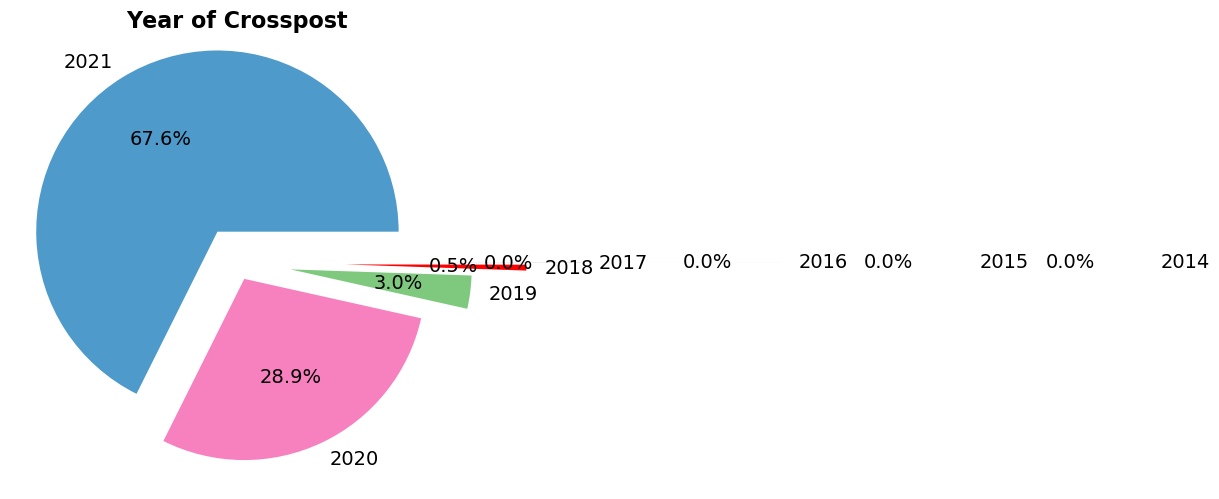

In [16]:
df_year = df['year'].value_counts().rename_axis('year').reset_index(name='crosspost_count')

# = ['#0000e8','#F4A0F2','magenta','#ffcc99']
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0.2,0.1, 0.3, 0.6,0.9,2,3,4)  
# Font size of text in pie chart
textprops = {"fontsize":14} # Font size of text in pie chart

wedgeprops = {"linewidth": 4, 'width':1, "edgecolor":"k"} # Width = 1
plt.figure (figsize = (6,6),dpi=100)

plt.pie(df_year.crosspost_count,explode=explode, labels=df_year.year, startangle=0,
        autopct='%.1f%%',textprops =textprops, colors=color1)# Showing shadow of pie chart

plt.title('Year of Crosspost',fontsize=16,fontweight='bold') # Radius to increase or decrease the size of pie chart)

#plt.legend(fontsize=20,loc='upper right') # To show legend
plt.show()



### We analyze the distribution of data by year and month, year and day, year and day of the week
<font size="3"> Below the Bar Charts, and the tables with the numbers and percentages of crosspost<br>
    In "day_week" day 0 is equivalent to Monday, 1 Tuesday to so on

In [17]:
df.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent,new_date,days,time,year,month,day,hour,day_week
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature,2021-04-24 03:26:46,2021-04-24,03:26:46,2021,4,24,3,5
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature,2021-04-24 08:24:43,2021-04-24,08:24:43,2021,4,24,8,5
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews,2021-04-23 22:56:03,2021-04-23,22:56:03,2021,4,23,22,4
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews,2021-04-24 05:39:33,2021-04-24,05:39:33,2021,4,24,5,5
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews,2021-04-24 05:30:03,2021-04-24,05:30:03,2021,4,24,5,5


Number of crossposts broken down by  month  and Year:

year   2014  2015  2016  2017  2018  2019   2020   2021
month                                                  
1         0     0     0     3    21   212   1713  16313
2         0     0     0     0    21   275   1893  19948
3         1     0     0     2    31   228   2620  36807
4         0     0     0     2    76   288   2707  68179
5         0     0     0     2    65   445   4021      0
6         0     0     0     0    75   371   6072      0
7         0     0     1     0    46   414   4549      0
8         0     2     2     0   147   441   5587      0
9         0     1     1     1   149   642   5942      0
10        0     0     1     1   127   690   6524      0
11        0     0     0    10   178  1131   7623      0
12        0     0     2    16   146  1026  11050      0

Percentage of crossposts broken down by  month  and Year:

year       2014      2015      2016      2017      2018      2019      2020  \
month                 

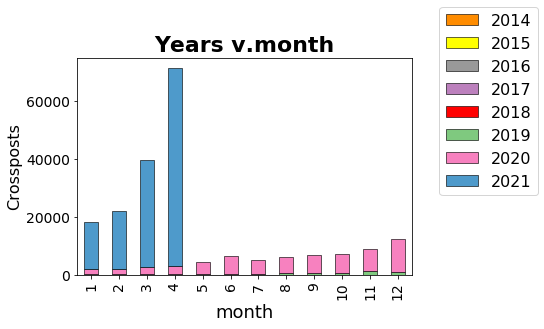

Number of crossposts broken down by  day  and Year:

year  2014  2015  2016  2017  2018  2019  2020   2021
day                                                  
1        0     0     0     2    69   211  1690   3491
2        0     0     0     1    41   217  1973   3654
3        0     0     1     0    29   172  2022   3892
4        0     1     0     1    27   135  2244   3721
5        0     0     2     1    18   212  1914   3848
6        0     0     0     0    24   172  1760   3951
7        0     0     0     0    57   162  2026   3917
8        0     0     0     0    18   222  1734   4064
9        0     0     0     1    26   151  1628   4315
10       0     0     0     1    75   218  1832   4253
11       0     0     0     0    25   286  2128   4039
12       0     0     0     6    13   168  1750   4621
13       0     0     0     1    25   281  1964   5197
14       0     2     0     2    28   322  1849   4956
15       0     0     0     1    14   147  2164   5174
16       0     0     1     3 

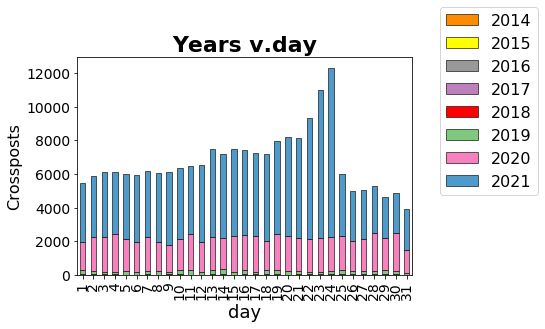

Number of crossposts broken down by  day_week  and Year:

year      2014  2015  2016  2017  2018  2019  2020   2021
day_week                                                 
0            1     0     2     3   137   881  8711  17173
1            0     0     0     8   128   939  8972  18881
2            0     0     1     5   110   884  8753  19869
3            0     0     1     8   111   950  9580  22195
4            0     3     1     2   227   844  8401  23538
5            0     0     1     6   179   889  8039  23773
6            0     0     1     5   190   776  7845  15818

Percentage of crossposts broken down by  day_week  and Year:

year          2014      2015      2016      2017      2018      2019  \
day_week                                                               
0         0.000037  0.000000  0.000074  0.000111  0.005091  0.032741   
1         0.000000  0.000000  0.000000  0.000277  0.004425  0.032460   
2         0.000000  0.000000  0.000034  0.000169  0.003713  0.029843 

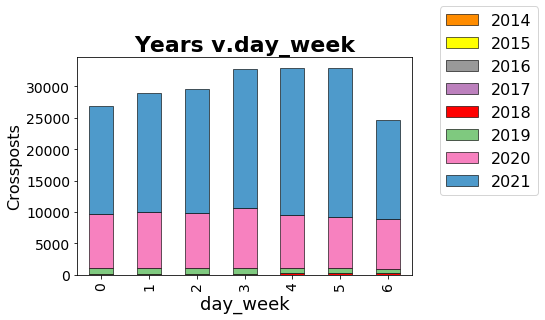

Number of crossposts broken down by  hour  and Year:

year  2014  2015  2016  2017  2018  2019  2020  2021
hour                                                
0        0     0     0     2    57   282  3232  7342
1        0     0     1     0    53   306  3160  7463
2        0     0     0     4    48   256  3205  7601
3        0     0     0     2    50   371  3182  7608
4        0     0     0     2    42   347  3545  7530
5        0     0     0     2    55   293  3354  7217
6        0     0     0     1    58   314  3061  7230
7        0     0     0     1    62   323  2893  7011
8        0     1     0     6    44   283  2674  6553
9        0     0     1     2    59   272  2714  6321
10       0     0     0     2    53   281  2621  6173
11       0     1     0     3    59   292  2674  6234
12       0     0     1     2    55   305  2535  5715
13       0     0     0     2    47   303  2278  5180
14       0     0     1     1    45   211  1883  4541
15       0     0     1     2    33   187  192

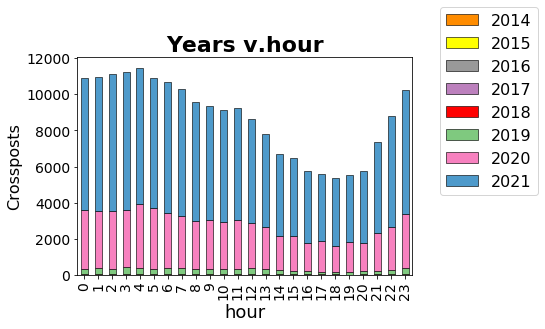

In [18]:
for i in ['month','day','day_week','hour']:
    
    a=[]   
    a_pct=[]
    a = pd.crosstab(df[i], df['year'])
    a_pct =a.div(a.sum(1).astype(float), axis=0)
    print('Number of crossposts broken down by ',i ,' and Year:\n' )
    print(a) 
    print('\nPercentage of crossposts broken down by ',i ,' and Year:\n' )
    print(a_pct)
    a.plot(kind='bar',alpha=1, stacked=True, color=color3,edgecolor='black', linewidth=0.6)
    plt.title('Years v.'+i,fontsize=22, fontweight='bold')
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Crossposts', fontsize=16)
    plt.legend( fontsize=16,bbox_to_anchor=(1.4,0.8),loc='right')
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()


### Let's analyze the "score" and "comments" attributes

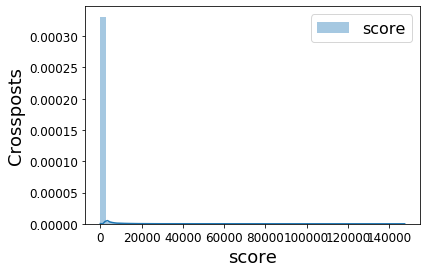

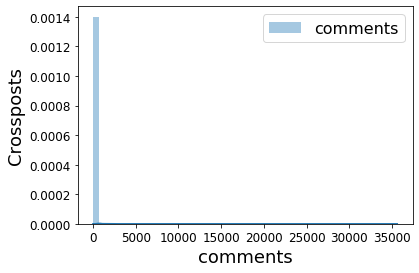

In [19]:
import seaborn as sns, numpy as np
for i in ['score','comments']:
    df_sc=[]
    df_sc= df[i]
   # sns.distplot(df_sc, x=df.columns[i], kde=True)
    sns.distplot(df_sc,hist =True, kde=True, label=i)
    plt.xlabel(i,size=18)
    plt.ylabel('Crossposts',size=18)
    plt.legend(loc="best", fontsize=16, frameon=True)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
    


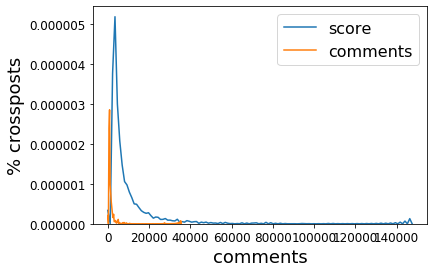

In [20]:
import seaborn as sns, numpy as np
color5=['blue','deepskyblue']

for i in ['score','comments']:
    df_sc=[]
    df_sc= df[i]
   # sns.distplot(df_sc, x=df.columns[i], kde=True)
  
    sns.distplot(df_sc,hist =False, kde=True,bins=30, label=i)
                                                                                
    plt.xlabel(i,size=18)
    plt.ylabel('% crossposts',size=18)
    plt.legend(loc="best", fontsize=16, frameon=True)
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

### Boxplot of "score" e "comments" attributes

0.1         1.0
0.2         2.0
0.3         4.0
0.4         9.0
0.5        18.0
0.6        35.0
0.7        64.0
0.8       131.0
0.9       373.0
1.0    147549.0
Name: score, dtype: float64 

0.1        0.0
0.2        0.0
0.3        0.0
0.4        0.0
0.5        1.0
0.6        2.0
0.7        4.0
0.8        8.0
0.9       19.0
1.0    35614.0
Name: comments, dtype: float64 



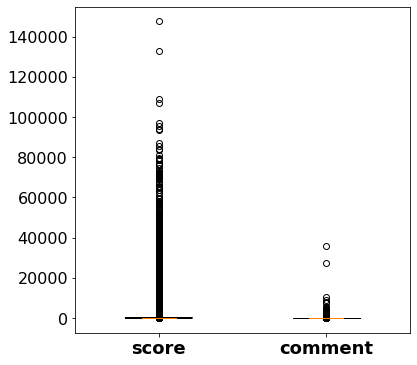

In [21]:
import numpy as np
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plot

plt.figure (figsize = (6,6))
box=plt.boxplot([df['score'],df['comments']],notch=True,widths=0.4, patch_artist=True)
plt.xticks([1,2],['score','comment'],size=18,fontweight='bold')
plt.yticks(size=16)
#Get relevant percentiles and see their distribution
print(df[df.columns[5]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]),'\n')
print(df[df.columns[7]].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]),'\n')

In [22]:
for i in ['from','to','parent','id','title']:
    val=[]
    val=df[i].value_counts()
    print('Values or names contained in the attribute "'+ i +'" and associated quantities\n')
    print(val,'\n')

Values or names contained in the attribute "from" and associated quantities

Catrin                   477
GIFSThatMakeThings       466
hacha                    457
moreofmytrash            455
earthaliens              446
AgroForestry             445
Natureisfuckingnope      434
kayotic123               429
iwouldtotallybuythis     428
Castelbon                415
Nuthinbuttrouble         410
PoliceAccountability1    403
hotposts                 402
Reddit100k               399
RektByFactsAndLogic      396
IWork4DavidBrock         393
PresidentBernie          384
ArcanaPost               379
TibblesandRosie          376
dumaflache               376
Delaware4Sanders         374
thestateofshit           372
SurpriseJudo             371
dannygroen               370
SealifeGifs              363
theAlgorithmHasSpoken    360
shitamericanspayfor      360
somecoolguys             360
DrinkingProblems         356
michaelbaygifs           354
                        ... 
lupus                   

### We evaluate the correlations between the various attributes
As we see in the "correlations"table, the "Comment" and "score" attributes have a fairly high correlation, as so "year" and "date".
This could be useful to us in order to subsequently choose only one value among those correlated between them.
I suggest keeping the "year" attribute and removing the "date" attribute.
So you can choose the "comment" or "score" attribute,one among them.
Why? Because when the attributes are correlated, it is useless to carry them along in the next stages in both

In [23]:
import seaborn as sb
from collections import defaultdict
from scipy.stats.stats import pearsonr
sb.set(color_codes=True)

In [24]:
tab_corel=df.corr()
tab_corel

,Unnamed: 0,score,date,comments,year,month,day,hour,day_week
Unnamed: 0,1.000000,-0.006299,-0.204347,-0.018762,-0.189836,0.083138,-0.041008,0.015879,-0.011803
score,-0.006299,1.000000,-0.002432,0.505064,-0.001663,-0.001681,0.015204,0.017157,0.011272
date,-0.204347,-0.002432,1.000000,0.002248,0.904027,-0.343075,0.057673,0.002458,0.026344
comments,-0.018762,0.505064,0.002248,1.000000,0.000400,0.002073,0.008926,0.009150,0.005711
year,-0.189836,-0.001663,0.904027,0.000400,1.000000,-0.709915,0.008679,0.004227,0.027229
month,0.083138,-0.001681,-0.343075,0.002073,-0.709915,1.000000,-0.011654,-0.007956,-0.020975
day,-0.041008,0.015204,0.057673,0.008926,0.008679,-0.011654,1.000000,-0.002959,0.049483
hour,0.015879,0.017157,0.002458,0.009150,0.004227,-0.007956,-0.002959,1.000000,-0.018105
day_week,-0.011803,0.011272,0.026344,0.005711,0.027229,-0.020975,0.049483,-0.018105,1.000000


C:\Users\cinzia\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


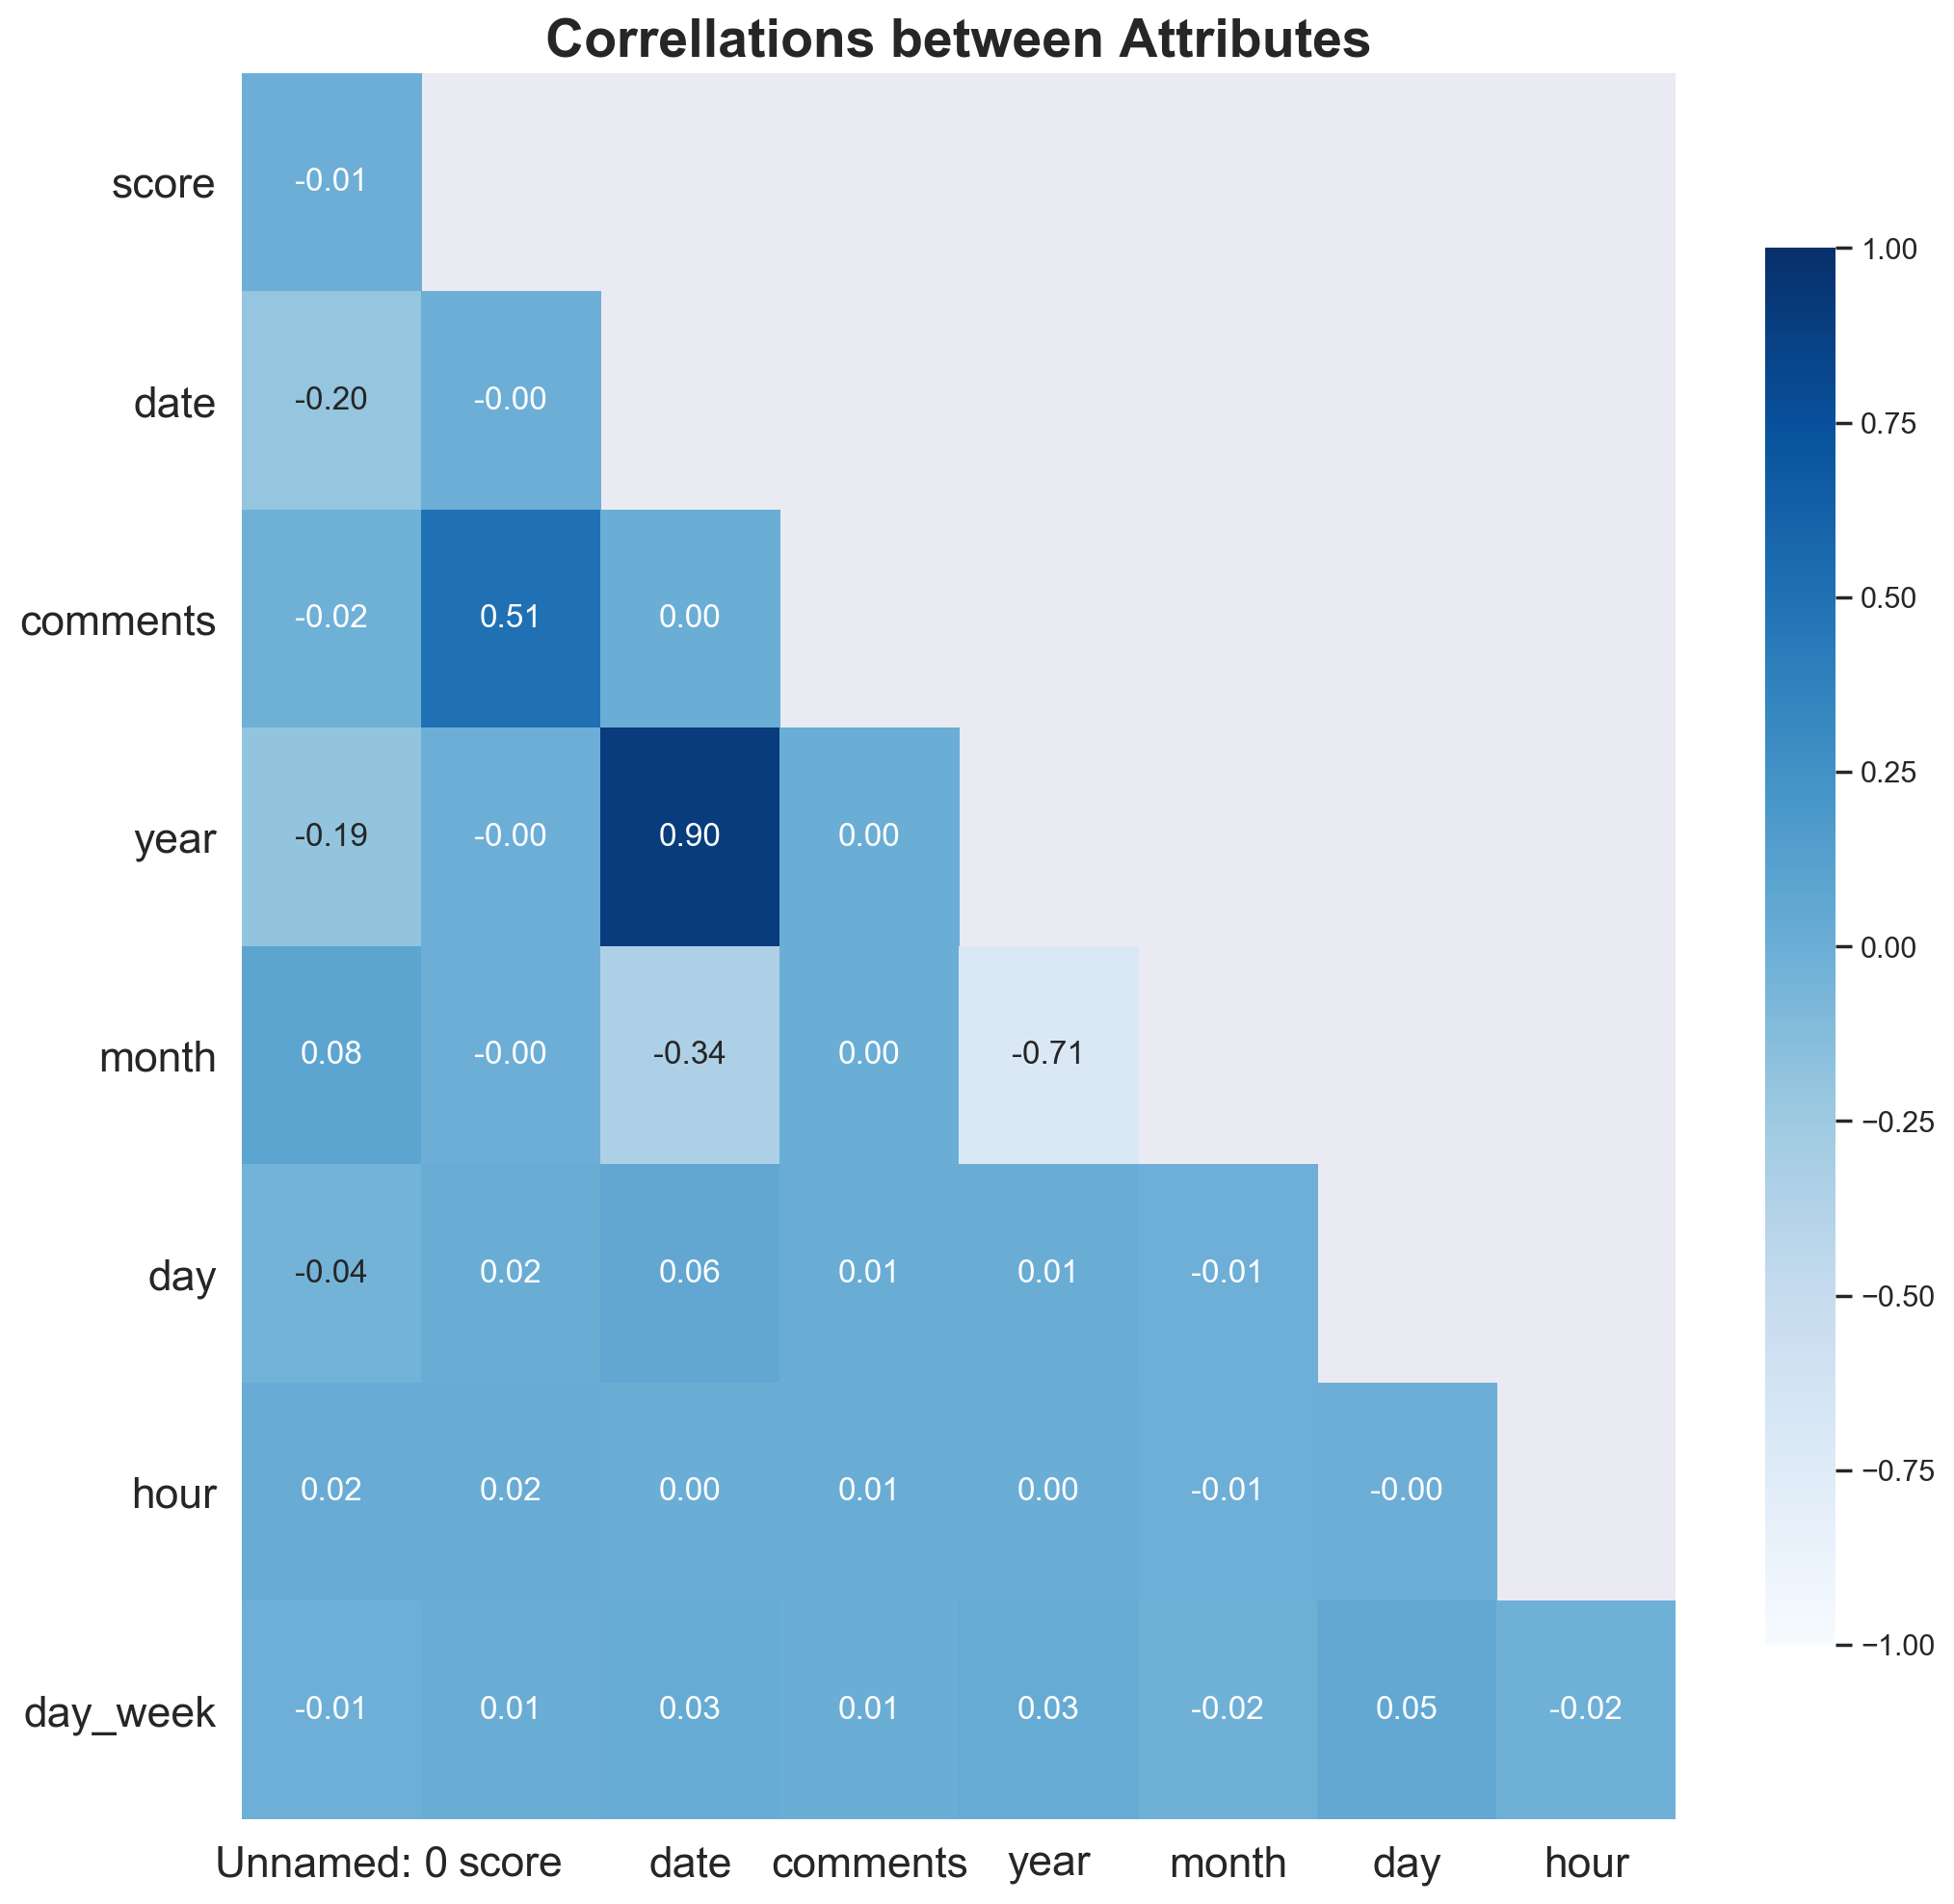

In [25]:

fig, ax = plt.subplots(figsize=(12,12),dpi=200)
# mask
mask = np.triu(np.ones_like(tab_corel, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = tab_corel.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title('Correllations between Attributes',fontweight='bold', fontsize=20)
# yticks
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
